In [1]:
import os
import shutil
from tqdm import tqdm
from random import shuffle
import cv2
import numpy as np

In [2]:
for i in os.listdir("Dataset"):
    print(os.path.basename("Dataset/"+i),len(os.listdir("Dataset/"+i)))

Euron Greyjoy 26
Jon Snow 103
Cersei Lannister 206
Qyburn 33
Daenerys Targaryen 103
Ser Davos 23
Samwell Tarly 20
Arya Stark 26
the hound 32
Peytr Baelish 18
Unknown - not a face 21
Theon Greyjoy 56
Jaime Lannister 113
Sansa Stark 31
Brienne of Tarth 26
Bronn 33
Podrick 28
Tyrion Lannister 101
Unknown Person 195
Jorah Mormont 33
Missandei 34
Varys 35


In [3]:
os.makedirs("Dataset-new/train")
os.makedirs("Dataset-new/test")

In [4]:
for i in tqdm(os.listdir("Dataset")):
    if i=="Cersei Lannister" or i=="Jaime Lannister" or i=="Tyrion Lannister":
        os.makedirs("Dataset-new/train/"+i)
        os.makedirs("Dataset-new/test/"+i)
        for j in os.listdir("Dataset/"+i)[:70]:
            shutil.copy("Dataset/"+i+"/"+j,"Dataset-new/train/"+i)
        for j in os.listdir("Dataset/"+i)[70:100]:
            shutil.copy("Dataset/"+i+"/"+j,"Dataset-new/test/"+i)

100%|██████████| 22/22 [00:00<00:00, 77.29it/s]


In [5]:
print("Training Data")
for i in os.listdir("Dataset-new/train"):
    print(os.path.basename("Dataset-new/train/"+i),len(os.listdir("Dataset-new/train/"+i)))

Training Data
Cersei Lannister 70
Jaime Lannister 70
Tyrion Lannister 70


In [6]:
print("Testing Data")
for i in os.listdir("Dataset-new/test"):
    print(os.path.basename("Dataset-new/test/"+i),len(os.listdir("Dataset-new/test/"+i)))

Testing Data
Cersei Lannister 30
Jaime Lannister 30
Tyrion Lannister 30


In [7]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
TRAIN_DIR = "Dataset-new/train"
VALIDATION_DIR = "Dataset-new/test"

In [9]:
from keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE_NEW = 96
BATCH_SIZE = 10

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)

validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IMAGE_SIZE_NEW, IMAGE_SIZE_NEW),
    batch_size = BATCH_SIZE,
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (IMAGE_SIZE_NEW, IMAGE_SIZE_NEW),
    batch_size = BATCH_SIZE,
)

Using TensorFlow backend.


Found 210 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(IMAGE_SIZE_NEW,IMAGE_SIZE_NEW,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               4333696   
__________

In [11]:
steps_per_epoch = train_generator.n 
validation_steps = validation_generator.n

history=model.fit_generator(train_generator,
                            epochs=3,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=validation_generator,
                            validation_steps=validation_steps)

Epoch 1/3
210/210 [==============================] - 42s 200ms/step - loss: 0.4049 - acc: 0.8324 - val_loss: 0.3637 - val_acc: 0.8456
Epoch 2/3
210/210 [==============================] - 42s 200ms/step - loss: 0.0714 - acc: 0.9781 - val_loss: 0.1456 - val_acc: 0.9444
Epoch 3/3
210/210 [==============================] - 41s 196ms/step - loss: 0.0462 - acc: 0.9876 - val_loss: 0.1969 - val_acc: 0.9433


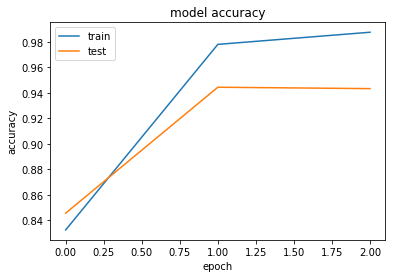

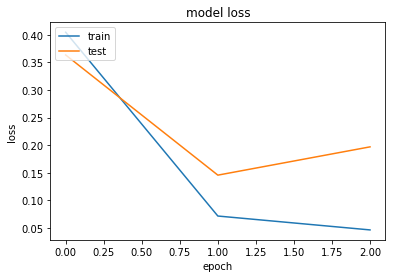

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()